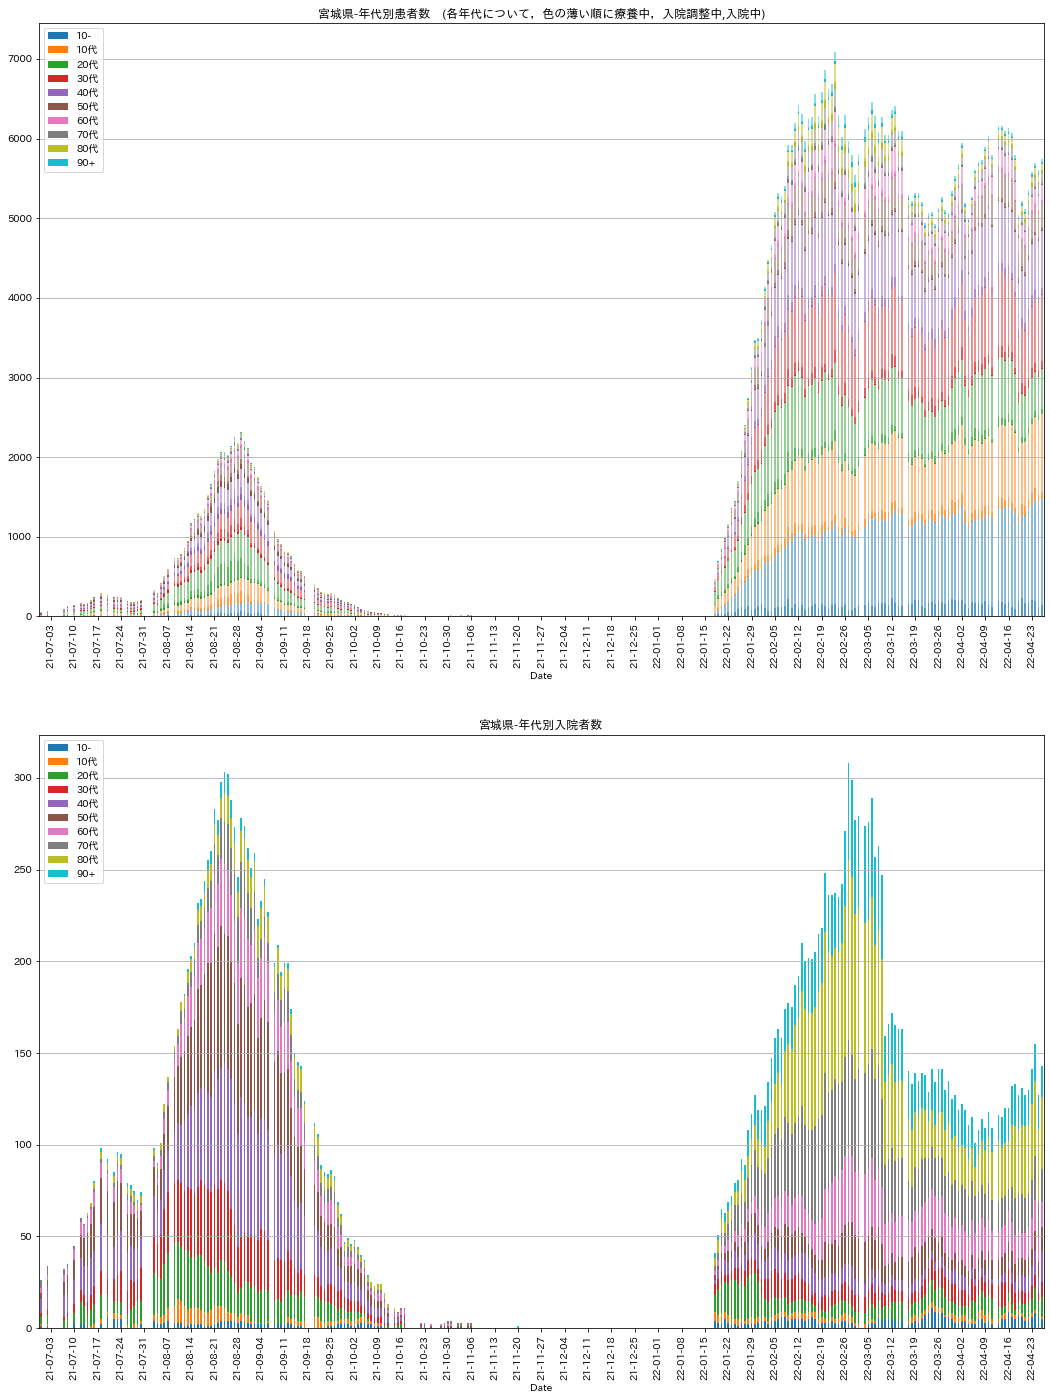

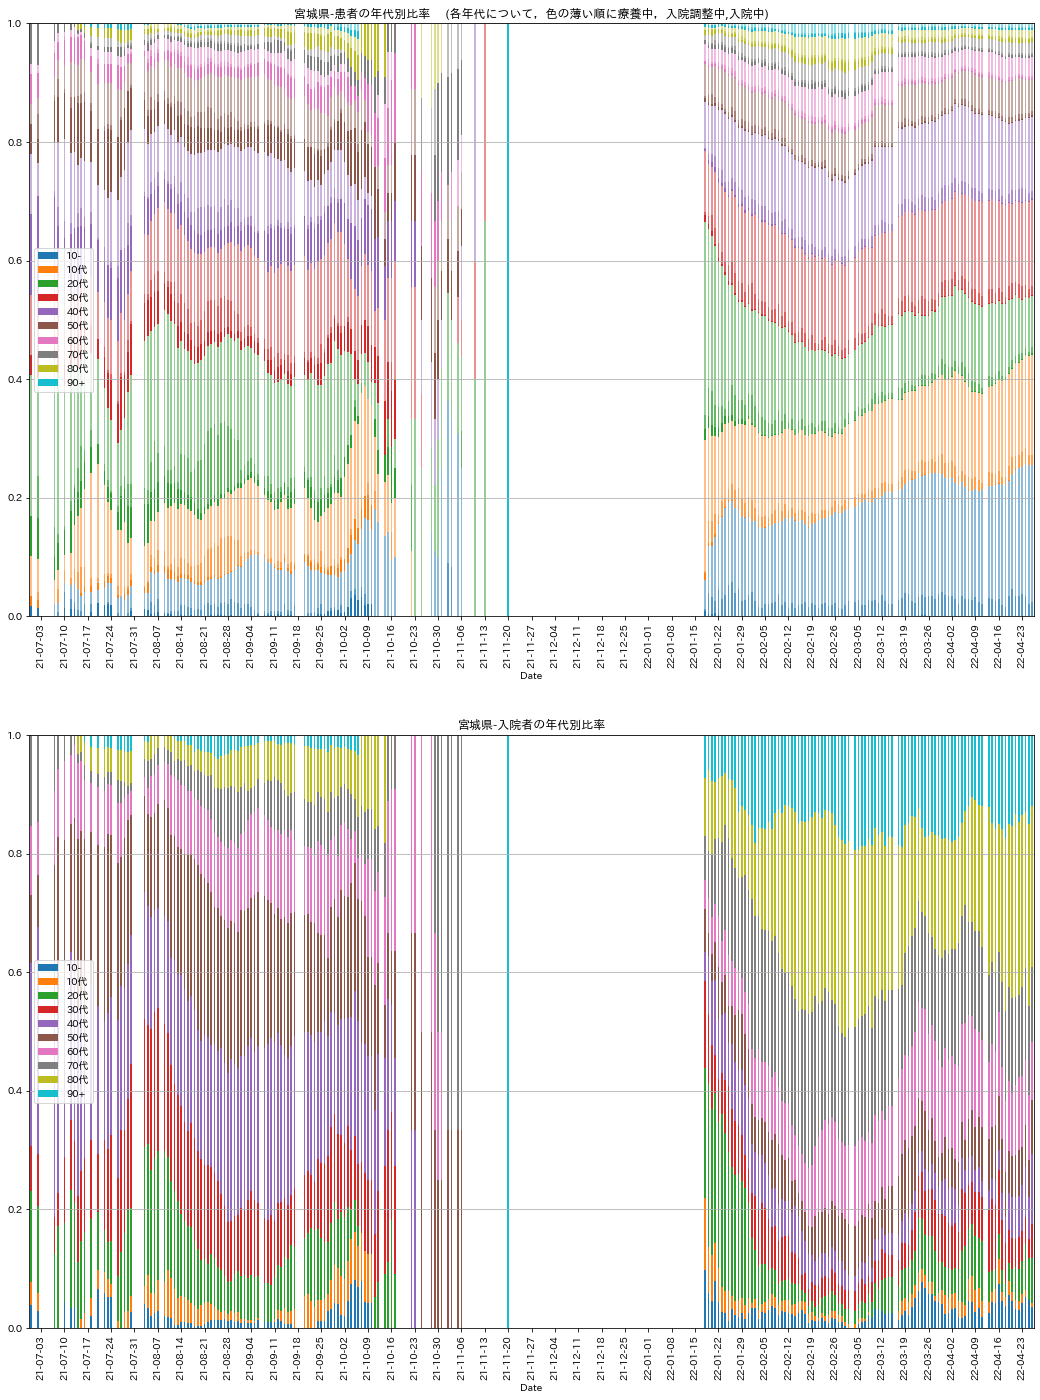

In [144]:
import numpy as np
import pandas as pd
import datetime as dt
from itertools import product
from matplotlib  import pyplot as plt
import japanize_matplotlib
from matplotlib import dates as mdates 

df_url = "https://raw.githubusercontent.com/nagae/CoVid-19/main/data/CoVid19-Miyagi-daily_patients_by_age.csv"
df = pd.read_csv(df_url, header=[0,1], index_col=0)
df = df.set_index(pd.to_datetime(df.index))
latest_date = df.index[0]
latest_date_str = latest_date.strftime("%Y-%m-%d")
ages = ["10歳未満", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代", "90歳以上"]
age_label = ["10-", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代", "90+"]

########################################
fig, ax = plt.subplots(2,1,figsize=(18,12*2))
# 最初のグラフ
colors1 = []
for i in range(10):
    colors1 += ['C{}'.format(i)]*3
plot_df = df.T.loc[product(ages, ["入院中", "入院調整中", "療養中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind='bar', stacked='True', ax=ax[0], color=colors1)
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[0].xaxis.set_major_locator(weeks)
ax[0].set_title("宮城県-年代別患者数　(各年代について，色の薄い順に療養中，入院調整中,入院中)")
ax[0].grid(axis='y', zorder=1)
alphas = [1.0,0.75,0.5]
for pid,p in enumerate(ax[0].patches):
    p.set_alpha( alphas[ pid//len(plot_df) % 3])
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h[::3],age_label,loc="upper left")

# 2つめのグラフ
colors2 = []
for i in range(10):
    colors2 += ['C{}'.format(i)]
plot_df = df.T.loc[product(ages, ["入院中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind='bar', stacked='True', ax=ax[1], color=colors2)
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[1].xaxis.set_major_locator(weeks)
ax[1].set_title("宮城県-年代別入院者数")
ax[1].grid(axis='y', zorder=1)
h,l = ax[1].get_legend_handles_labels()
ax[1].legend(h,age_label,loc="upper left")

# グラフの保存
plt.savefig("fig/CoVid19-Miyagi-patients_by_age.png", bbox_inches="tight")
########################################
fig, ax = plt.subplots(2,1,figsize=(18,12*2))
# 最初のグラフ
colors1 = []
for i in range(10):
    colors1 += ['C{}'.format(i)]*3
colors2 = []
for i in range(10):
    colors2 += ['C{}'.format(i)]

# 3つめのグラフ
plot_df = df.T.loc[product(ages, ["入院中", "入院調整中", "療養中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.apply(lambda x: x/x.sum(), axis=1)
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind="bar",stacked="True",ax=ax[0],color=colors1)
ax[0].set_title("宮城県-患者の年代別比率 　(各年代について，色の薄い順に療養中，入院調整中,入院中)")
ax[0].grid(axis='y', zorder=1)
alphas = [1.0,0.75,0.5]
for pid,p in enumerate(ax[0].patches):
    p.set_alpha( alphas[ pid//len(plot_df) % 3])
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h[::3],age_label,loc="center left")
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[0].xaxis.set_major_locator(weeks)
ax[0].set_ylim((0,1))

# 4つめのグラフ
plot_df = df.T.loc[product(ages, ["入院中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.apply(lambda x: x/x.sum(), axis=1)
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind="bar",stacked="True",ax=ax[1],color=colors2)
ax[1].set_title("宮城県-入院者の年代別比率")
ax[1].grid(axis='y', zorder=1)
h,l = ax[1].get_legend_handles_labels()
ax[1].legend(h, age_label, loc="center left")
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[1].xaxis.set_major_locator(weeks)
ax[1].set_ylim((0,1))

# グラフの保存
plt.savefig("fig/CoVid19-Miyagi-patients_by_age_rate.png", bbox_inches="tight")
plt.show()

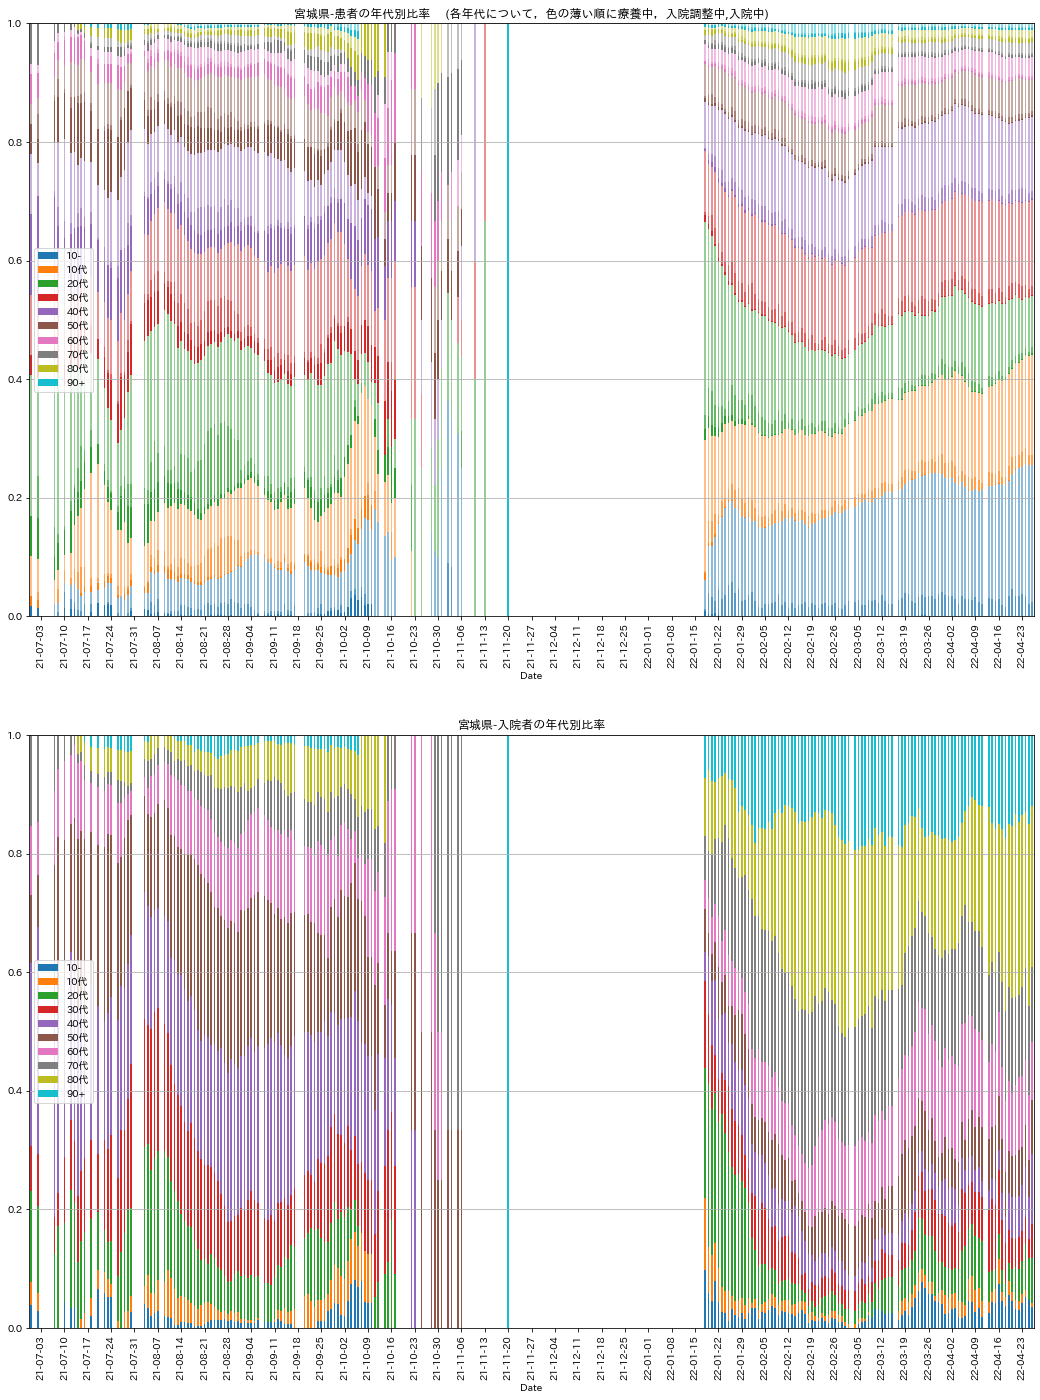

In [142]:
########################################
fig, ax = plt.subplots(2,1,figsize=(18,12*2))
# 最初のグラフ
colors1 = []
for i in range(10):
    colors1 += ['C{}'.format(i)]*3
colors2 = []
for i in range(10):
    colors2 += ['C{}'.format(i)]

# 3つめのグラフ
plot_df = df.T.loc[product(ages, ["入院中", "入院調整中", "療養中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.apply(lambda x: x/x.sum(), axis=1)
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind="bar",stacked="True",ax=ax[0],color=colors1)
ax[0].set_title("宮城県-患者の年代別比率 　(各年代について，色の薄い順に療養中，入院調整中,入院中)")
ax[0].grid(axis='y', zorder=1)
alphas = [1.0,0.75,0.5]
for pid,p in enumerate(ax[0].patches):
    p.set_alpha( alphas[ pid//len(plot_df) % 3])
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h[::3],age_label,loc="center left")
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[0].xaxis.set_major_locator(weeks)
ax[0].set_ylim((0,1))
# 4つめのグラフ
plot_df = df.T.loc[product(ages, ["入院中"])].fillna(0).astype(int).T[-1::-1]
plot_df = plot_df.apply(lambda x: x/x.sum(), axis=1)
plot_df = plot_df.resample('D').mean()
plot_df['Date'] = plot_df.index.strftime('%y-%m-%d')
plot_df.plot(x='Date', kind="bar",stacked="True",ax=ax[1],color=colors2)
ax[1].set_title("宮城県-入院者の年代別比率")
ax[1].grid(axis='y', zorder=1)
h,l = ax[1].get_legend_handles_labels()
ax[1].legend(h, age_label, loc="center left")
weeks = mdates.WeekdayLocator(byweekday=mdates.SU, tz=None)
ax[1].xaxis.set_major_locator(weeks)
ax[1].set_ylim((0,1))


# グラフの保存
plt.savefig("fig/CoVid19-Miyagi-patients_by_age_rate.png", bbox_inches="tight")
plt.show()

In [120]:
plot_df.index.strftime('%b-%d')

Index(['Jun-30', 'Jul-01', 'Jul-02', 'Jul-03', 'Jul-04', 'Jul-05', 'Jul-06',
       'Jul-07', 'Jul-08', 'Jul-09',
       ...
       'Apr-17', 'Apr-18', 'Apr-19', 'Apr-20', 'Apr-21', 'Apr-22', 'Apr-23',
       'Apr-24', 'Apr-25', 'Apr-26'],
      dtype='object', length=301)

In [48]:
plot_df.index[0]

18808.0

In [38]:
plot_df

10歳未満                 10代                 20代               30代  \
             入院中  入院調整中     療養中  入院中  入院調整中    療養中   入院中 入院調整中    療養中  入院中   
2021-06-30   1.0    0.0     0.0  1.0    0.0    4.0   4.0   0.0   14.0  2.0   
2021-07-01   NaN    NaN     NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN   
2021-07-02   1.0    0.0     0.0  1.0    1.0    4.0   5.0   5.0   12.0  3.0   
2021-07-03   NaN    NaN     NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN   
2021-07-04   NaN    NaN     NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN   
...          ...    ...     ...  ...    ...    ...   ...   ...    ...  ...   
2022-04-22   4.0  176.0  1156.0  2.0  120.0  830.0   7.0  71.0  504.0  7.0   
2022-04-23   6.0  206.0  1191.0  2.0  147.0  861.0   8.0  64.0  495.0  7.0   
2022-04-24   8.0  190.0  1266.0  2.0  148.0  896.0  12.0  55.0  492.0  7.0   
2022-04-25   6.0  112.0  1313.0  0.0   94.0  936.0   9.0  28.0  512.0  4.0   
2022-04-26   5.0  137.0  1328.0  1.0   92.0  974.0  11.0  58.0  500.0  8.0   

            ...    60代   70代                80代             90歳以上              
            ...    療養中   入院中 入院調整中    療養中   入院中 入院調整中   療養中   入院中 入院調整中   療養中  
2021-06-30  ...    1.0   4.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2021-07-01  ...    NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2021-07-02  ...    1.0   5.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2021-07-03  ...    NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2021-07-04  ...    NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...         ...    ...   ...   ...    ...   ...   ...   ...   ...   ...   ...  
2022-04-22  ...  154.0  18.0  14.0   94.0  38.0  13.0  65.0  19.0   8.0  30.0  
2022-04-23  ...  162.0  21.0  21.0   93.0  41.0  15.0  67.0  19.0  14.0  32.0  
2022-04-24  ...  167.0  24.0  14.0  104.0  41.0  12.0  73.0  20.0   9.0  38.0  
2022-04-25  ...  172.0  19.0  17.0  105.0  39.0  13.0  71.0  19.0   9.0  38.0  
2022-04-26  ...  182.0  18.0  19.0  111.0  39.0   7.0  73.0  17.0   6.0  38.0  

[301 rows x 30 columns]

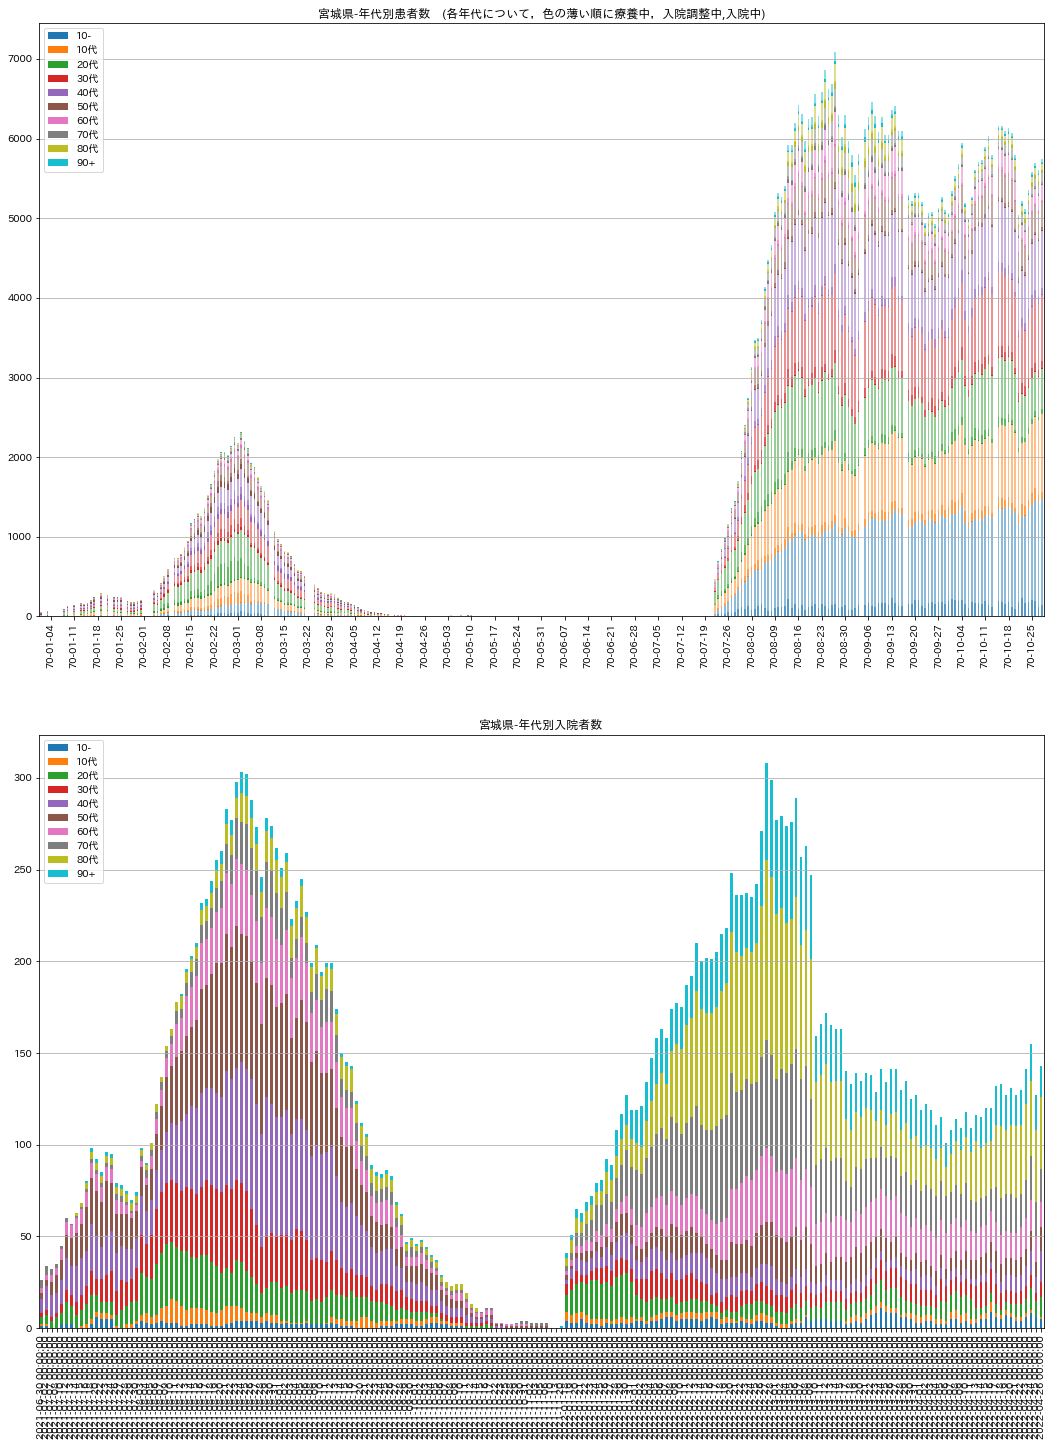

SyntaxError: 'break' outside loop (3162515330.py, line 50)

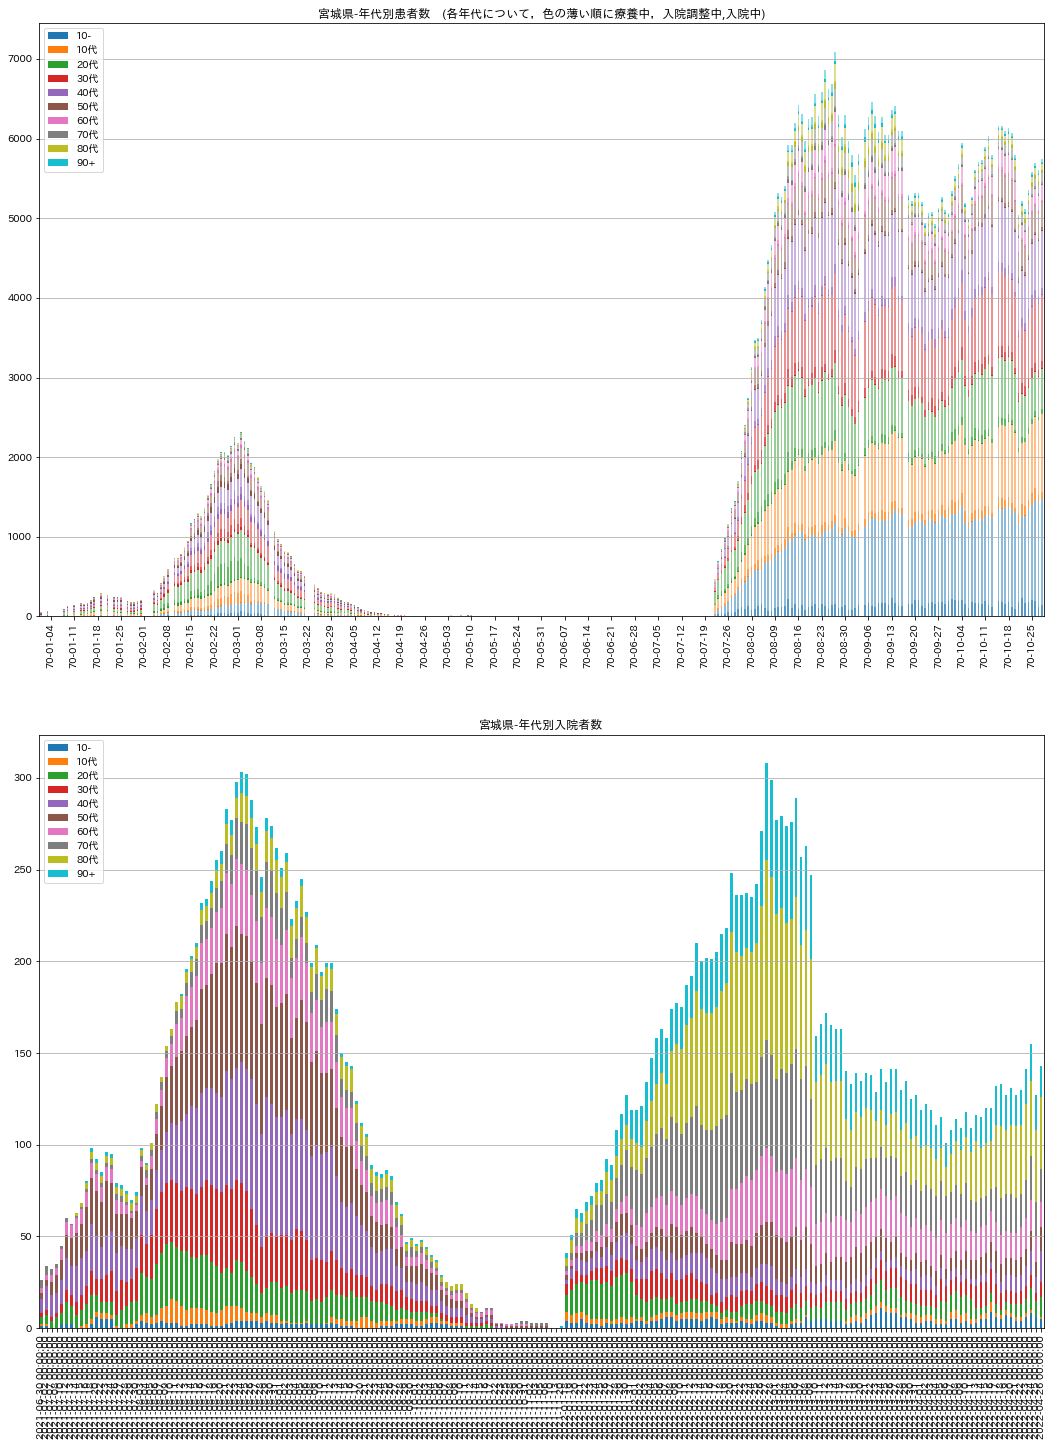

In [26]:
plot_df.index

DatetimeIndex(['2021-06-30', '2021-07-02', '2021-07-07', '2021-07-08',
               '2021-07-10', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16',
               ...
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26'],
              dtype='datetime64[ns]', length=201, freq=None)

In [14]:
start_date = plot_df.index[0]
end_date = plot_df.index[-1]
new_index = pd.date_range(start_date, end_date, freq='D')
new_df = pd.DataFrame(index=new_index)
new_df.merge(plot_df, how="outer", left_index=True, right_index=True)


/var/folders/8x/ly2rk4qj673f9qx0s2tc7nh80000gn/T/ipykernel_97238/351721794.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  new_df.merge(plot_df, how="outer", left_index=True, right_index=True)


,"(10歳未満, 入院中)","(10代, 入院中)","(20代, 入院中)","(30代, 入院中)","(40代, 入院中)","(50代, 入院中)","(60代, 入院中)","(70代, 入院中)","(80代, 入院中)","(90歳以上, 入院中)"
2021-06-30,1.0,1.0,4.0,2.0,8.0,3.0,3.0,4.0,0.0,0.0
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,1.0,1.0,5.0,3.0,13.0,3.0,3.0,5.0,0.0,0.0
2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-22,4.0,2.0,7.0,7.0,9.0,10.0,16.0,18.0,38.0,19.0
2022-04-23,6.0,2.0,8.0,7.0,11.0,9.0,17.0,21.0,41.0,19.0
2022-04-24,8.0,2.0,12.0,7.0,13.0,11.0,17.0,24.0,41.0,20.0
2022-04-25,6.0,0.0,9.0,4.0,9.0,8.0,14.0,19.0,39.0,19.0


<AxesSubplot:>

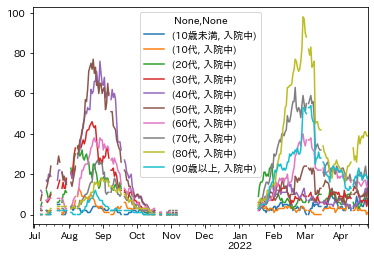

In [17]:
plot_df.resample('D').mean().plot()

In [25]:
plot_df.index

DatetimeIndex(['2021-06-30', '2021-07-02', '2021-07-07', '2021-07-08',
               '2021-07-10', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16',
               ...
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26'],
              dtype='datetime64[ns]', length=201, freq=None)